# Cleaning Data

** Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [23]:
#read json and convert to csv

df = pd.read_json("final_dataset.json")

df.to_csv("cleaned_data.csv")

In [218]:
##UPDATE

df.to_csv("cleaned_data.csv")

In [4]:
# check csv

df.head(10)

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
14,https://www.immoweb.be/en/classified/apartment...,1.0,1,1994.0,Belgium,Brussels,NaN,None,1.0,NaN,...,NaN,NaN,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale
15,https://www.immoweb.be/en/classified/house/for...,4.0,6,1970.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,NaN,1.0,...,NaN,0.0,GOOD,villa,2519.0,NaN,1.0,5.0,1,residential_monthly_rent
18,https://www.immoweb.be/en/classified/house/for...,0.0,2,NaN,Belgium,Mechelen,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,None,house,423.0,NaN,NaN,0.0,1,residential_sale
22,https://www.immoweb.be/en/classified/apartment...,2.0,3,2023.0,Belgium,Halle-Vilvoorde,NaN,None,NaN,NaN,...,NaN,0.0,None,apartment,NaN,0.0,NaN,NaN,2,residential_sale
23,https://www.immoweb.be/en/classified/apartment...,NaN,2,NaN,Belgium,Sint-Niklaas,NaN,None,NaN,NaN,...,NaN,0.0,None,apartment,NaN,NaN,NaN,NaN,2,residential_sale


In [7]:
# Type of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null   float64
 11  Kitchen            67134 non-null   object 
 12  LivingArea         104539 non-null  float64
 13  Locality           118712 non-null  object 
 14  MonthlyCharges     13650 non-null   float64
 15  NumberOfFacades    76942 non-null   float64
 16  PEB    

In [8]:
## Describe data

df.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,109112.000000,118714.000000,68898.000000,4123.0,30325.000000,22503.0,2.250300e+04,104539.000000,13650.000000,76942.000000,118714.000000,1.187140e+05,1.187140e+05,32916.000000,57127.000000,5.823700e+04,40358.000000,68344.0,9.644100e+04,118714.000000
mean,1.232898,2.708383,1987.345496,1.0,0.070041,1.0,4.509960e+04,167.396417,84.239853,2.791557,5166.113129,3.815797e+05,1.245875e+07,6.806538,0.696186,3.118253e+03,0.050994,1.0,4.120696e+01,1.509460
std,1.092045,1.855343,47.311922,0.0,0.255221,0.0,6.666220e+06,1814.592952,179.608171,0.872792,3060.657713,4.754330e+05,3.131297e+06,5.458941,6.563612,4.776406e+05,0.219987,0.0,1.234059e+04,0.499913
min,0.000000,0.000000,1753.000000,1.0,0.000000,1.0,1.000000e+00,9.000000,0.000000,1.000000,0.000000,1.000000e+00,1.882546e+06,1.000000,0.000000,0.000000e+00,0.000000,1.0,0.000000e+00,1.000000
25%,1.000000,2.000000,1964.000000,1.0,0.000000,1.0,4.800000e+01,90.000000,0.000000,2.000000,2250.000000,2.000000e+05,1.114592e+07,2.000000,0.000000,1.480000e+02,0.000000,1.0,1.000000e+00,1.000000
50%,1.000000,3.000000,2000.000000,1.0,0.000000,1.0,1.400000e+02,124.000000,30.000000,3.000000,4671.000000,3.095000e+05,1.138077e+07,6.000000,0.000000,3.530000e+02,0.000000,1.0,1.000000e+00,2.000000
75%,1.000000,3.000000,2023.000000,1.0,0.000000,1.0,4.500000e+02,182.000000,120.000000,4.000000,8400.000000,4.390000e+05,1.146776e+07,10.000000,1.000000,8.000000e+02,0.000000,1.0,2.000000e+00,2.000000
max,145.000000,200.000000,8071.000000,1.0,1.000000,1.0,1.000000e+09,452230.000000,5250.000000,24.000000,9992.000000,3.500000e+07,2.002586e+07,68.000000,1120.000000,1.152500e+08,1.000000,1.0,3.832365e+06,2.000000


In [9]:
# Fixing index
df.reset_index(drop=True)


,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,https://www.immoweb.be/en/classified/house/for...,1.0,3,2024.0,Belgium,Gent,NaN,None,NaN,1.0,...,4.0,NaN,GOOD,house,234.0,NaN,NaN,0.0,1,residential_sale
118710,https://www.immoweb.be/en/classified/house/for...,4.0,4,NaN,Belgium,Antwerp,NaN,None,0.0,NaN,...,NaN,NaN,JUST_RENOVATED,apartment_block,202.0,NaN,NaN,NaN,1,residential_sale
118711,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,NaN,NaN,...,NaN,NaN,GOOD,apartment,NaN,0.0,1.0,1.0,2,residential_sale
118712,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Brugge,NaN,POSSIBLE_FLOOD_ZONE,NaN,NaN,...,8.0,NaN,None,apartment,NaN,NaN,1.0,NaN,2,residential_sale


In [75]:
#columns list

df.columns

Index(['Url', 'bathroom', 'bedroom', 'construction_year', 'country',
       'district', 'fireplace', 'flooding_zone', 'furnished', 'garden',
       'garden_area', 'kitchen', 'living_area', 'locality', 'monthly_charges',
       'facades', 'PEB', 'postal_code', 'price', 'property_id', 'province',
       'region', 'room_count', 'state_of_building', 'subtype_of_property',
       'surface_of_plot', 'swimming_pool', 'terrace', 'toilet_count',
       'type_of_property'],
      dtype='object')

In [25]:
# changing name of columns

new_column_names = {

    'BathroomCount': 'bathroom',
    'BedroomCount': 'bedroom',
    'ConstructionYear': 'construction_year',
    'Country': 'country',
    'District': 'district',
    'Fireplace': 'fireplace',
    'FloodingZone': 'flooding_zone',
    'Furnished': 'furnished',
    'Garden': 'garden',
    'GardenArea': 'garden_area',
    'Kitchen': 'kitchen',
    'LivingArea': 'living_area',
    'Locality': 'locality',
    'MonthlyCharges': 'monthly_charges',
    'NumberOfFacades': 'facades',
    'PEB': 'PEB',
    'PostalCode': 'postal_code',
    'Price': 'price',
    'PropertyId': 'property_id',
    'Province': 'province',
    'Region': 'region',
    'RoomCount': 'room_count',
    'ShowerCount': 'shower',
    'StateOfBuilding': 'state_of_building',
    'SubtypeOfProperty': 'subtype_of_property',
    'SurfaceOfPlot': 'surface_of_plot',
    'SwimmingPool': 'swimming_pool',
    'Terrace': 'terrace',
    'ToiletCount': 'toilet_count',
    'TypeOfProperty': 'type_of_property',
    'TypeOfSale': 'type_of_sale'
}

df = df.rename(columns=new_column_names)

** Most Important Features

Bathroom    ///    Bedroom  ///     Living Area

**Cleaning Plan


1. Bathroom
2.  Bedroom
3. Living Area
.
.
.

***** 

1. FIRST DROPS

In [56]:
df = df.loc[df['type_of_sale'] == 'residential_sale']



In [57]:
del df['type_of_sale']

In [58]:
#check
df.head()

,Url,bathroom,bedroom,construction_year,country,district,fireplace,flooding_zone,furnished,garden,...,region,room_count,shower,state_of_building,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property
2,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,...,Flanders,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2
6,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,...,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1
8,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,Flanders,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1
10,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,...,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1
11,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,Flanders,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2


In [62]:
# price minvalues fixing

df = df[df['price'] >= 40000]


In [74]:
#removed shower
del df['shower']

****************

# Bathroom


In [27]:
df['bathroom'].info()

<class 'pandas.core.series.Series'>
Index: 118714 entries, 2 to 181792
Series name: bathroom
Non-Null Count   Dtype  
--------------   -----  
109112 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [28]:
df['bathroom'].isna().sum()

9602

In [29]:
bathroom_zero_data = df[df['bathroom'] == 0]

bathroom_zero_data['Url'].tolist()


['https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668',
 'https://www.immoweb.be/en/classified/house/for-sale/putte/2580/10956546',
 'https://www.immoweb.be/en/classified/house/for-sale/oignies/5670/10955843',
 'https://www.immoweb.be/en/classified/house/for-sale/stekene/9190/10955294',
 'https://www.immoweb.be/en/classified/house/for-sale/beernem/8730/10954396',
 'https://www.immoweb.be/en/classified/house/for-sale/zelzate/9060/10954112',
 'https://www.immoweb.be/en/classified/house/for-sale/knokke-heist/8300/10954089',
 'https://www.immoweb.be/en/classified/apartment/for-sale/knokke-heist/8300/10952301',
 'https://www.immoweb.be/en/classified/house/for-sale/genk/3600/10951146',
 'https://www.immoweb.be/en/classified/house/for-sale/zwevezele/8750/10950270',
 'https://www.immoweb.be/en/classified/house/for-sale/zwevezele/8750/10950267',
 'https://www.immoweb.be/en/classified/house/for-sale/ichtegem/8480/10949108',
 'https://www.immoweb.be/en/classified/house/f

In [73]:
#for bathroom finding the max and min values and of course some mistakes
df['bathroom'].max()

58.0

In [63]:
bathroom_zero_data = df[df['bathroom'] == 0 ]

bathroom_zero_data['Url'].tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668',
 'https://www.immoweb.be/en/classified/house/for-sale/putte/2580/10956546',
 'https://www.immoweb.be/en/classified/house/for-sale/oignies/5670/10955843',
 'https://www.immoweb.be/en/classified/house/for-sale/stekene/9190/10955294',
 'https://www.immoweb.be/en/classified/house/for-sale/beernem/8730/10954396',
 'https://www.immoweb.be/en/classified/house/for-sale/zelzate/9060/10954112',
 'https://www.immoweb.be/en/classified/house/for-sale/knokke-heist/8300/10954089',
 'https://www.immoweb.be/en/classified/apartment/for-sale/knokke-heist/8300/10952301',
 'https://www.immoweb.be/en/classified/house/for-sale/genk/3600/10951146',
 'https://www.immoweb.be/en/classified/house/for-sale/zwevezele/8750/10950270',
 'https://www.immoweb.be/en/classified/house/for-sale/zwevezele/8750/10950267',
 'https://www.immoweb.be/en/classified/house/for-sale/ichtegem/8480/10949108',
 'https://www.immoweb.be/en/classified/house/f

In [46]:
property_data = df[df['property_id'] ==10890954]

property_data['Url'].tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/zandhoven/2240/10890954']

In [70]:
mask = df['bathroom'].isna() 
#df.loc[mask, 'living_area'] = 45  
df.loc[mask, 'bathroom'] = 1


### “I manually adjusted the maximum number (and 0 bathroom) of bathrooms to maintain the data as accurately as possible.”

In [71]:
bathroom_zero_data = df[df['bathroom'].isna()  ]

bathroom_zero_data['Url'].tolist()

#len(bathroom_zero_data)

[]

In [129]:
df.isna().sum()

Url                         0
bathroom                    0
bedroom                     0
construction_year       41810
country                     0
district                    6
fireplace              101198
flooding_zone           51448
furnished               74614
garden                  84364
garden_area             84364
kitchen                 47053
living_area             11277
locality                    2
monthly_charges        104871
facades                 36804
PEB                     30497
postal_code                 0
price                       0
property_id                 0
province                    6
region                      6
room_count              75788
state_of_building       33408
subtype_of_property         0
surface_of_plot         49686
swimming_pool           71630
terrace                 44263
toilet_count            20163
type_of_property            0
dtype: int64

********

# Bedroom



In [76]:
df['bedroom'].info()

<class 'pandas.core.series.Series'>
Index: 104871 entries, 2 to 181791
Series name: bedroom
Non-Null Count   Dtype
--------------   -----
104871 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [77]:
df['bedroom'].max()

200

In [128]:
bedroom_data = df[df['bedroom'] > 80]

bedroom_data['Url'].tolist()
#len(bedroom_data)


['https://www.immoweb.be/en/classified/house/for-sale/ronse/9600/11456300',
 'https://www.immoweb.be/en/classified/apartment/for-sale/ronse/9600/11456299',
 'https://www.immoweb.be/en/classified/house/for-sale/schaerbeek/1030/11313431',
 'https://www.immoweb.be/en/classified/house/for-sale/charleroi/6010/11013620']

In [110]:
df['subtype_of_property'].value_counts()

subtype_of_property
house                   42861
apartment               39343
villa                    4828
ground_floor             3014
apartment_block          2453
penthouse                2115
duplex                   2067
mixed_use_building       1869
flat_studio              1634
mansion                   654
service_flat              588
town_house                569
bungalow                  445
exceptional_property      402
kot                       397
country_cottage           384
farmhouse                 340
loft                      339
triplex                   189
chalet                    160
other_property             82
manor_house                77
castle                     59
pavilion                    2
Name: count, dtype: int64

In [124]:
zerobedroomhouse = df.loc[(df['bedroom'] == 0) & (df['subtype_of_property'] == 'duplex')]

zerobedroomhouse['Url'].tolist()

#len(zerobedroomhouse)

[]

In [123]:
#with special condition fixing bedroom manually
'''
condition = (df['bedroom'] == 0) & (df['subtype_of_property'] == 'duplex')
#condition = (df['bedroom'] == 0) & (df['subtype_of_property'] == 'manor_house')
#condition = (df['bedroom'] == 0) & (df['subtype_of_property'] == 'villa')
#condition = (df['bedroom'] == 0) & (df['subtype_of_property'] == 'house')
zerobedroomhouse = df.loc[condition]


def update_bedrooms(row):
    if row['price'] < 100000:
        return 1
    elif row['price'] > 200000:
        return 2
    elif row['price'] > 500000:
        return 3
    elif row['price'] > 1000000:
        return 4
    elif row['price'] > 2000000:
        return 5
    else:
        return 5

# 'bedroom' update
zerobedroomhouse['bedroom'] = zerobedroomhouse.apply(update_bedrooms, axis=1)

# update
df.loc[condition, 'bedroom'] = zerobedroomhouse['bedroom']
'''


/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_5362/1562839914.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zerobedroomhouse['bedroom'] = zerobedroomhouse.apply(update_bedrooms, axis=1)


*********

# Living Area

In [207]:
df['living_area'].isna().sum()

11277

In [205]:
zerolivingarea = df[df['living_area'] > 2000]

zerolivingarea['Url'].tolist()

['https://www.immoweb.be/en/classified/house/for-sale/la-louviere/7100/10895434',
 'https://www.immoweb.be/en/classified/house/for-sale/st-gilles/1060/10679997',
 'https://www.immoweb.be/en/classified/house/for-sale/geel/2440/10853405',
 'https://www.immoweb.be/en/classified/house/for-sale/saint-servais/5002/10801319',
 'https://www.immoweb.be/en/classified/house/for-sale/verviers/4800/11481911',
 'https://www.immoweb.be/en/classified/house/for-sale/tournai-kain/7540/11477836',
 'https://www.immoweb.be/en/classified/house/for-sale/zerkegem/8490/20017007',
 'https://www.immoweb.be/en/classified/house/for-sale/ledegem/8880/11407723',
 'https://www.immoweb.be/en/classified/house/for-sale/verviers/4800/11438359',
 'https://www.immoweb.be/en/classified/house/for-sale/anderlecht/1070/11388325',
 'https://www.immoweb.be/en/classified/house/for-sale/huy/4500/11430933',
 'https://www.immoweb.be/en/classified/house/for-sale/ciney/5590/11426340',
 'https://www.immoweb.be/en/classified/house/for-s

In [200]:
zerolivingarea = df[df['living_area'] == 3100]

zerolivingarea['Url'].tolist()

['https://www.immoweb.be/en/classified/house/for-sale/oudenaarde/9700/11312299']

In [203]:
# Fixing manually some datas mixing livingarea with surfaceofplot
# fixed a lot by using same code.....
df.loc[df['living_area'] == 3076, 'living_area'] = 500
df.loc[df['property_id'] == 11491913, 'surface_of_plot'] = 2576

In [210]:
#OUTLIERS (done)
'''
# without nan count outliers
clean_data = df['living_area'].dropna()
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1

# limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# without nan and keep rest of  values
df = df[(df['living_area'].between(lower_bound, upper_bound, inclusive="both")) | (df['living_area'].isna())]
'''

In [214]:
df['living_area'].isna().sum()

11277

In [219]:
#with KNNI fillna (done)

# KNNI object
imputer = KNNImputer(n_neighbors=10)

# fillna
df['living_area'] = imputer.fit_transform(df[['living_area']])

In [224]:
df['living_area'].describe()

count    98003.000000
mean       135.620995
std         58.133789
min         12.000000
25%         93.000000
50%        134.000000
75%        165.000000
max        326.000000
Name: living_area, dtype: float64

**FIRST CHEKING DATA** AND UPDATE

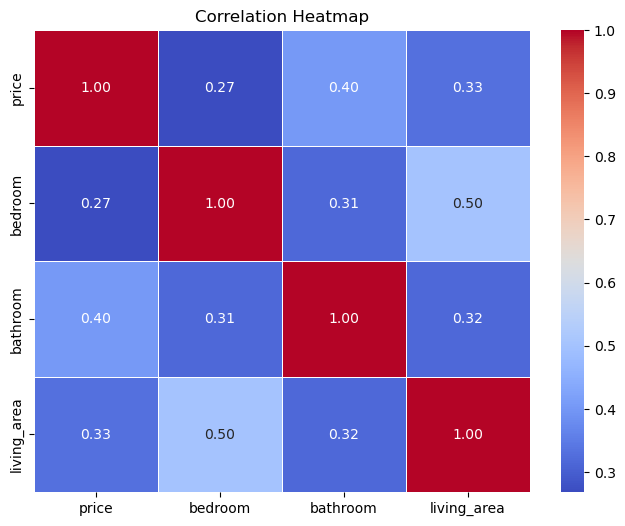

In [226]:
#HEATMAP 
corr_matrix = df[['price', 'bedroom', 'bathroom', 'living_area']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [225]:
df.to_csv("first_check.csv", index=False)

*********
# Construction_Year

In [217]:
#Outliers (done)
'''
# without nan count outliers
clean_data = df['construction_year'].dropna()
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1

# limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# without nan and keep rest of  values
df = df[(df['construction_year'].between(lower_bound, upper_bound, inclusive="both")) | (df['construction_year'].isna())]
'''

**first_check DATA**

In [10]:
df1= pd.read_csv("first_check.csv")

In [11]:
df1['construction_year'].max()

2033.0

In [321]:
df1['construction_year'].isna().sum()

39917

In [230]:
#before KNNI describe
df1['construction_year'].describe()

count    58086.000000
mean      1991.541198
std         35.404199
min       1878.000000
25%       1966.000000
50%       2005.000000
75%       2023.000000
max       2033.000000
Name: construction_year, dtype: float64

In [322]:
#with KNNI fillna 

# KNNI object
imputer = KNNImputer(n_neighbors=10)

# fillna
df1['construction_year'] = imputer.fit_transform(df1[['construction_year']])

In [323]:
#after KNNI describe
df1['construction_year'].describe()

count    98003.000000
mean      1991.541198
std         27.256451
min       1878.000000
25%       1990.000000
50%       1991.541198
75%       2017.000000
max       2033.000000
Name: construction_year, dtype: float64

In [325]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98003 entries, 0 to 98002
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Url                  98003 non-null  object 
 1   bathroom             98003 non-null  float64
 2   bedroom              98003 non-null  int64  
 3   construction_year    98003 non-null  float64
 4   district             97997 non-null  object 
 5   fireplace            2769 non-null   float64
 6   flooding_zone        49428 non-null  object 
 7   furnished            27756 non-null  float64
 8   garden               18349 non-null  float64
 9   garden_area          18349 non-null  float64
 10  kitchen              53669 non-null  object 
 11  living_area          98003 non-null  float64
 12  locality             97998 non-null  object 
 13  facades              62203 non-null  float64
 14  PEB                  68245 non-null  object 
 15  postal_code          98003 non-null 

****
**SOME DROPS**

In [324]:
del df1['country']
del df1['monthly_charges']

********

# CONVERT SOME FEATURES TO TRUE_FALSE

**furnished / fireplace / garden / swimming_pool / terrace / type_of_property**

In [328]:
#checking unique values
df1['furnished'].value_counts()

furnished
0.0    25816
1.0     1940
Name: count, dtype: int64

**Furnished**

In [327]:
df1['furnished'].isna().sum()

70247

In [329]:
furnished_nan = df1[df1['furnished'].isna()]


furnished_nan['Url'].tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010',
 'https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664',
 'https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668',
 'https://www.immoweb.be/en/classified/house/for-sale/putte/2580/10956546',
 'https://www.immoweb.be/en/classified/apartment/for-sale/vilvoorde/1800/10956452',
 'https://www.immoweb.be/en/classified/apartment/for-sale/temse/9140/10956305',
 'https://www.immoweb.be/en/classified/apartment/for-sale/temse/9140/10956121',
 'https://www.immoweb.be/en/classified/house/for-sale/ieper/8900/10956042',
 'https://www.immoweb.be/en/classified/house/for-sale/ghlin/7011/10956002',
 'https://www.immoweb.be/en/classified/apartment/for-sale/namur/5000/10955972',
 'https://www.immoweb.be/en/classified/apartment/for-sale/de-panne/8660/10955588',
 'https://www.immoweb.be/en/classified/house/for-sale/liege/4000/10955486',
 'https://www.immoweb.be/en/classified/apart

In [330]:
#after checking the data I decided to fill nan with 0.

df1['furnished'] = df1['furnished'].fillna(0)

In [331]:
df1['furnished'] = df1['furnished'].astype(bool)

**Fireplace**

In [332]:
df1['fireplace'].isna().sum()

95234

In [333]:
df1['fireplace'] = df1['fireplace'].fillna(0)

In [334]:
df1['fireplace'] = df1['fireplace'].astype(bool)

**Garden**

In [380]:
df1['garden'].isna().sum()

0

In [381]:
garden_nan = df1[df1['garden'].isna()]

garden_nan['Url'].tolist()

[]

In [382]:
df1.garden.value_counts()

garden
False    60089
True     37914
Name: count, dtype: int64

In [368]:
filtered_df = df1.loc[(df1['subtype_of_property'] == 'ground_floor') & (df1['garden'] == 0)]

filtered_df.Url.tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/antwerpen-borgerhout/2140/10955579',
 'https://www.immoweb.be/en/classified/apartment/for-sale/antwerpen/2018/10955578',
 'https://www.immoweb.be/en/classified/apartment/for-sale/anderlecht/1070/10955173',
 'https://www.immoweb.be/en/classified/apartment/for-sale/antwerp-1/9040/10954807',
 'https://www.immoweb.be/en/classified/apartment/for-sale/knokke-heist/8300/10936932',
 'https://www.immoweb.be/en/classified/apartment/for-sale/puurs-sint-amands/2890/10934597',
 'https://www.immoweb.be/en/classified/apartment/for-sale/bilzen/3740/10931445',
 'https://www.immoweb.be/en/classified/apartment/for-sale/paal/3583/10929253',
 'https://www.immoweb.be/en/classified/apartment/for-sale/mons/7000/10928268',
 'https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-saint-lambert/1200/10926902',
 'https://www.immoweb.be/en/classified/apartment/for-sale/kruishoutem/9770/10923021',
 'https://www.immoweb.be/en/classified/apartment/for-

In [261]:
df1.subtype_of_property.value_counts()

subtype_of_property
house                   39874
apartment               39077
villa                    3506
ground_floor             3000
penthouse                2083
duplex                   2032
apartment_block          1741
flat_studio              1625
mixed_use_building       1313
service_flat              588
town_house                552
bungalow                  439
kot                       394
mansion                   369
loft                      301
country_cottage           237
farmhouse                 219
exceptional_property      208
triplex                   172
chalet                    159
other_property             60
manor_house                40
castle                     12
pavilion                    2
Name: count, dtype: int64

In [364]:
#fixing manually for True(more than 1)
df1.loc[(df['subtype_of_property'] == 'bungalow') & (df1['garden'] == 0), 'garden'] = 1


In [356]:
#fixing manually for False
df1.loc[(df['subtype_of_property'] == 'flat_studio') & (df1['garden'] == 1), 'garden'] = 0

In [354]:
df1['garden'] = df1['garden'].fillna(0)

In [370]:
df1['garden'] = df1['garden'].astype(bool)

**Type of Property**

**it's category** 

In [404]:
df1.type_of_property.value_counts()

type_of_property
2    49272
1    48731
Name: count, dtype: int64

In [406]:
df1.type_of_property.isna().sum()

0

**Swimming Pool**

In [383]:
df1.swimming_pool.value_counts()

swimming_pool
False    96844
True      1159
Name: count, dtype: int64

In [373]:
df1['swimming_pool'] = df1['swimming_pool'].fillna(0)

In [374]:
df1['swimming_pool'] = df1['swimming_pool'].astype(bool)

**Terrace**

In [377]:
df1.terrace.value_counts()

terrace
1.0    56594
0.0    41409
Name: count, dtype: int64

In [376]:
df1['terrace'] = df1['terrace'].fillna(0)

In [378]:
df1['terrace'] = df1['terrace'].astype(bool)

*****

**SECOND CHECK AND UPDATE**

<Axes: xlabel='terrace', ylabel='price'>

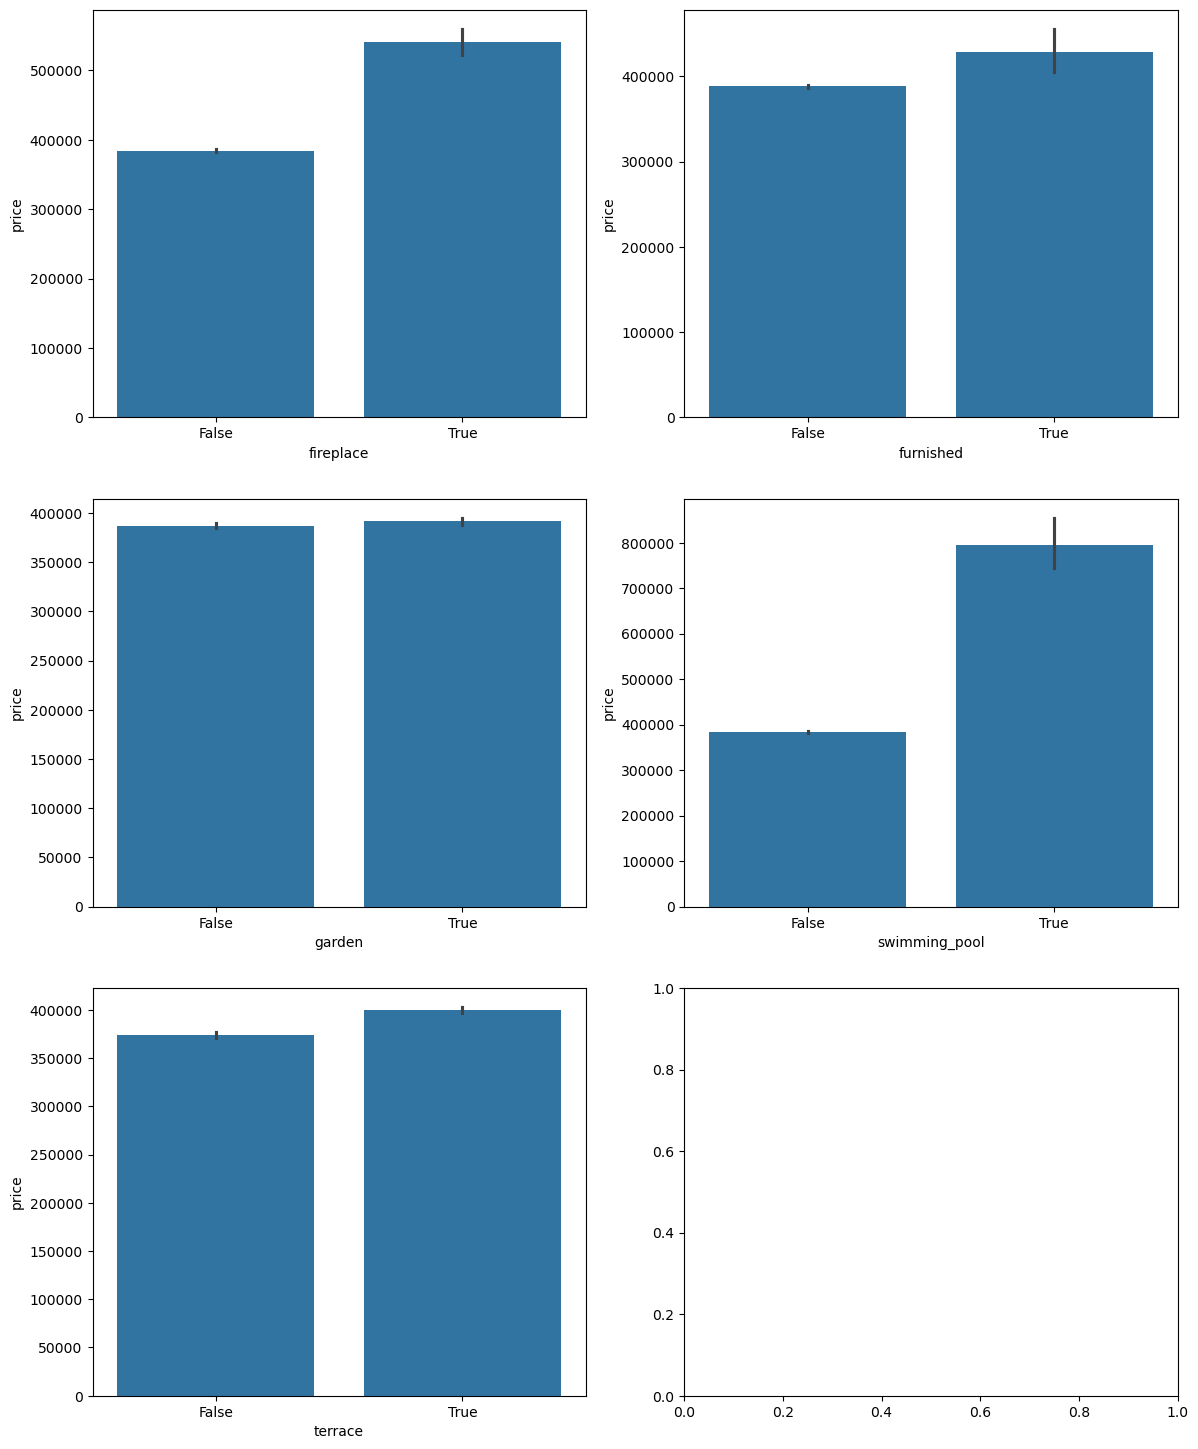

In [407]:
# Boolean ve kategorik değişkenlerin sayısal değerler üzerindeki etkisi
fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # Ayarlayabileceğiniz subplots sayısı
sns.barplot(x='fireplace', y='price', data=df1, ax=axes[0, 0])
sns.barplot(x='furnished', y='price', data=df1, ax=axes[0, 1])
sns.barplot(x='garden', y='price', data=df1, ax=axes[1, 0])
sns.barplot(x='swimming_pool', y='price', data=df1, ax=axes[1, 1])
sns.barplot(x='terrace', y='price', data=df1, ax=axes[2, 0])

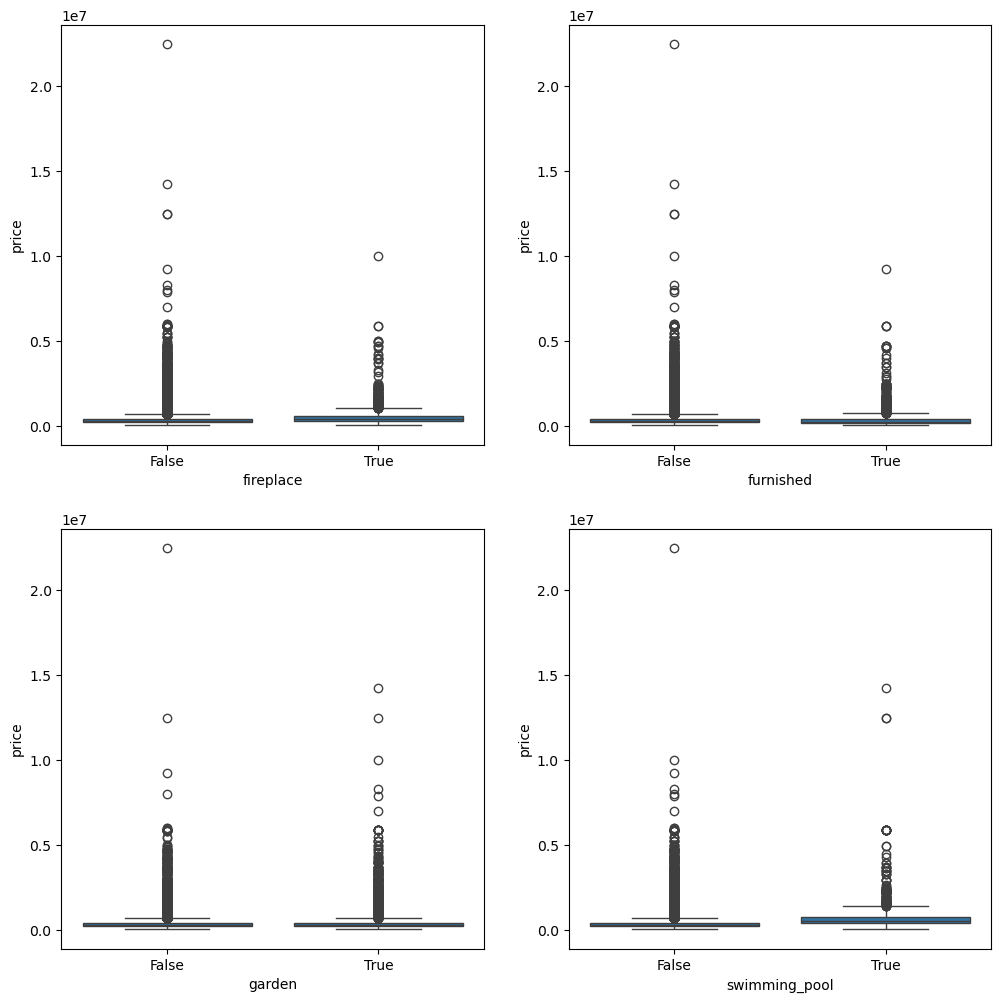

In [386]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(x='fireplace', y='price', data=df1, ax=axes[0, 0])
sns.boxplot(x='furnished', y='price', data=df1, ax=axes[0, 1])
sns.boxplot(x='garden', y='price', data=df1, ax=axes[1, 0])
sns.boxplot(x='swimming_pool', y='price', data=df1, ax=axes[1, 1])
plt.show()

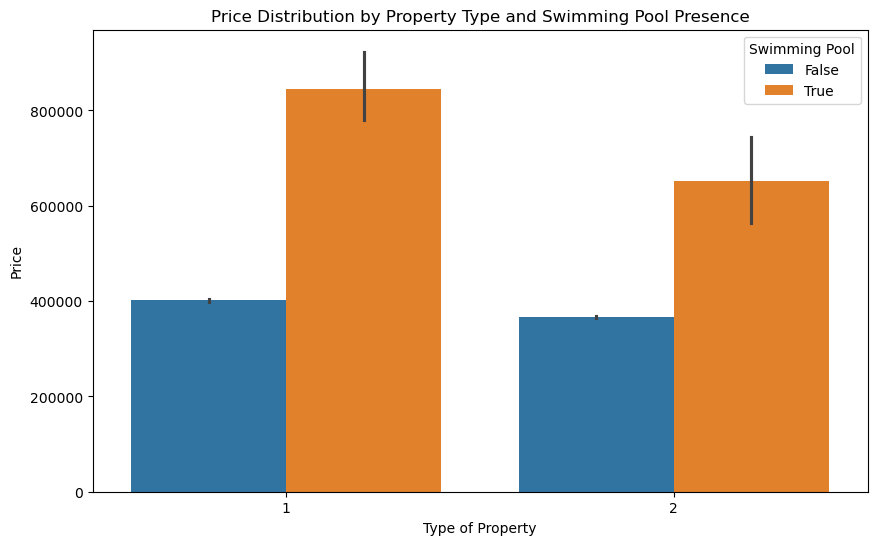

In [402]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type_of_property', y='price', hue='swimming_pool', data=df1)
plt.title('Price Distribution by Property Type and Swimming Pool Presence')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.legend(title='Swimming Pool')
plt.show()

**UPDATE**


In [405]:
df1.to_csv("second_check.csv", index=False)

************

**Some Corrections and Check**

In [3]:
df2 = pd.read_csv("second_check.csv")

In [69]:
df2.head()

,Url,bathroom,bedroom,construction_year,district,fireplace,flooding_zone,furnished,garden,garden_area,...,province,region,room_count,state_of_building,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,False,0,False,False,NaN,...,West Flanders,Flanders,1.0,GOOD,flat_studio,NaN,False,True,1.0,2
1,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,False,0,True,False,NaN,...,West Flanders,Flanders,NaN,GOOD,house,0.0,False,False,2.0,1
2,https://www.immoweb.be/en/classified/house/for...,1,4,1991,Veurne,False,0,False,False,1.0,...,West Flanders,Flanders,NaN,TO_BE_DONE_UP,house,170.0,False,True,2.0,1
3,https://www.immoweb.be/en/classified/apartment...,1,2,1972,Hasselt,False,0,False,False,NaN,...,Limburg,Flanders,1.0,AS_NEW,apartment,NaN,False,True,1.0,2
4,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Brussels,False,0,True,False,NaN,...,Brussels,Brussels,NaN,AS_NEW,apartment,NaN,False,True,1.0,2


In [5]:
df2.columns

Index(['Url', 'bathroom', 'bedroom', 'construction_year', 'district',
       'fireplace', 'flooding_zone', 'furnished', 'garden', 'garden_area',
       'kitchen', 'living_area', 'locality', 'facades', 'PEB', 'postal_code',
       'price', 'property_id', 'province', 'region', 'room_count',
       'state_of_building', 'subtype_of_property', 'surface_of_plot',
       'swimming_pool', 'terrace', 'toilet_count', 'type_of_property'],
      dtype='object')

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97997 entries, 0 to 98002
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Url                  97997 non-null  object 
 1   bathroom             97997 non-null  int64  
 2   bedroom              97997 non-null  int64  
 3   construction_year    97997 non-null  int64  
 4   district             97997 non-null  object 
 5   fireplace            97997 non-null  bool   
 6   flooding_zone        97997 non-null  int64  
 7   furnished            97997 non-null  bool   
 8   garden               97997 non-null  bool   
 9   garden_area          18349 non-null  float64
 10  kitchen              97997 non-null  int64  
 11  living_area          97997 non-null  float64
 12  locality             97994 non-null  object 
 13  facades              62199 non-null  float64
 14  PEB                  68242 non-null  object 
 15  postal_code          97997 non-null  int6

In [104]:
df2.isna().sum()

Url                        0
bathroom                   0
bedroom                    0
construction_year          0
district                   0
fireplace                  0
flooding_zone              0
furnished                  0
garden                     0
garden_area            79648
kitchen                    0
living_area                0
locality                   3
facades                35798
PEB                    29755
postal_code                0
price                      0
property_id                0
province                   0
region                     0
room_count             70568
state_of_building      32026
subtype_of_property        0
surface_of_plot        49266
swimming_pool              0
terrace                    0
toilet_count           18807
type_of_property           0
dtype: int64

In [8]:
# Construction Year from float to int
df2['construction_year'] = df2['construction_year'].astype(int)

In [15]:
# Bathroom rounding with conditions
def custom_round(x):
    fractional_part = x - int(x)
    if 0 <= fractional_part <= 0.5:
        return np.floor(x)
    else:
        return np.ceil(x)

# `bathroom` sütununu özel yuvarlama fonksiyonuyla güncelle
df2['bathroom'] = df2['bathroom'].apply(custom_round).astype(int)

In [21]:
# District ---NaN values in 

df2 = df2.dropna(subset=['district'])

**********

**Floiding_zone Check**

In [26]:
df2.flooding_zone.value_counts()

flooding_zone
NON_FLOOD_ZONE                                     95979
POSSIBLE_FLOOD_ZONE                                 1328
RECOGNIZED_FLOOD_ZONE                                547
POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                   43
CIRCUMSCRIBED_WATERSIDE_ZONE                          40
CIRCUMSCRIBED_FLOOD_ZONE                              31
RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                 16
POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE                9
RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE        4
Name: count, dtype: int64

In [25]:
#all nan values fill with NON
df2['flooding_zone'].fillna('NON_FLOOD_ZONE', inplace=True)

/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/3241990757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flooding_zone'].fillna('NON_FLOOD_ZONE', inplace=True)


In [28]:
df2['flooding_zone'] = df2['flooding_zone'].apply(
    lambda x: x if x == 'NON_FLOOD_ZONE' else 'POSSIBLE_FLOOD_ZONE'
)

/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/836190616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flooding_zone'] = df2['flooding_zone'].apply(


In [31]:
df2.flooding_zone.value_counts()

flooding_zone
0    95979
1     2018
Name: count, dtype: int64

In [30]:
#convert to number

df2['flooding_zone'] = df2['flooding_zone'].map({'NON_FLOOD_ZONE': 0, 'POSSIBLE_FLOOD_ZONE': 1})

/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/1822186707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flooding_zone'] = df2['flooding_zone'].map({'NON_FLOOD_ZONE': 0, 'POSSIBLE_FLOOD_ZONE': 1})


********


**KITCHEN**

In [34]:
df2.kitchen.value_counts()

kitchen
INSTALLED             26532
HYPER_EQUIPPED        15361
SEMI_EQUIPPED          6484
NOT_INSTALLED          3391
USA_HYPER_EQUIPPED      887
USA_INSTALLED           824
USA_SEMI_EQUIPPED       114
USA_UNINSTALLED          76
Name: count, dtype: int64

In [35]:
kitchen_new_mapping = {
    'NOT_INSTALLED': 0,
    'INSTALLED': 1,
    'SEMI_EQUIPPED': 2,
    'HYPER_EQUIPPED': 3,
    'USA_HYPER_EQUIPPED':4,
    'USA_INSTALLED':5,
    'USA_SEMI_EQUIPPED':6,
    'USA_UNINSTALLED':7
}

df2['kitchen'] = df2.kitchen.replace(kitchen_new_mapping)

pd.to_numeric(df2['kitchen'])


/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/303633633.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['kitchen'] = df2.kitchen.replace(kitchen_new_mapping)
/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/303633633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kitchen'] = df2.kitchen.replace(kitchen_new_mapping)


0        NaN
1        1.0
2        NaN
3        NaN
4        3.0
        ... 
97998    2.0
97999    NaN
98000    NaN
98001    3.0
98002    NaN
Name: kitchen, Length: 97997, dtype: float64

In [101]:
df2.kitchen.value_counts()

kitchen
0.0    44824
1.0    26532
3.0    15361
2.0     8062
4.0     2161
5.0      824
6.0      157
7.0       76
Name: count, dtype: int64

In [84]:
kitchen_data = df2[df2['kitchen'] == 4.0]

kitchen_data['Url'].tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-st-lambert/1200/10954593',
 'https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-st-lambert/1200/10954612',
 'https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-st-lambert/1200/10954572',
 'https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-st-lambert/1200/10954371',
 'https://www.immoweb.be/en/classified/apartment/for-sale/st-lambrechts-woluwe/1200/10951925',
 'https://www.immoweb.be/en/classified/apartment/for-sale/woluwe-st-lambert/1200/10951873',
 'https://www.immoweb.be/en/classified/house/for-sale/auderghem/1160/10947430',
 'https://www.immoweb.be/en/classified/house/for-sale/meise/1860/10943997',
 'https://www.immoweb.be/en/classified/apartment/for-sale/drogenbos/1620/10924871',
 'https://www.immoweb.be/en/classified/apartment/for-sale/forest/1190/20025790',
 'https://www.immoweb.be/en/classified/house/for-sale/saint-ghislain/7334/20025785',
 'https://www.immoweb.be/en/classified/

In [97]:
#special conditions fillna manually

#df2.loc[(df2['subtype_of_property'] == 'duplex') & (df2['kitchen'].isna()), 'kitchen'] = 2

In [96]:
a = df2[df2['subtype_of_property'] =='duplex']

a['Url'].tolist()

['https://www.immoweb.be/en/classified/apartment/for-sale/anderlecht/1070/10955175',
 'https://www.immoweb.be/en/classified/apartment/for-sale/brugge-assebroek/8310/10953432',
 'https://www.immoweb.be/en/classified/apartment/for-sale/berchem-sainte-agathe/1082/10946279',
 'https://www.immoweb.be/en/classified/apartment/for-sale/leuven/3000/10944887',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944862',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944861',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944858',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944857',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944852',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944853',
 'https://www.immoweb.be/en/classified/apartment/for-sale/tielt-winge/3390/10944850',
 'https://www.immoweb.be/en/classified/apartm

In [100]:
df2['kitchen'] = df2['kitchen'].fillna(0)

/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/3497888498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kitchen'] = df2['kitchen'].fillna(0)


In [103]:
df2['kitchen'] = df2['kitchen'].astype(int)

/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_17056/1213677760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kitchen'] = df2['kitchen'].astype(int)


#THIRD UPDATE and CHECK

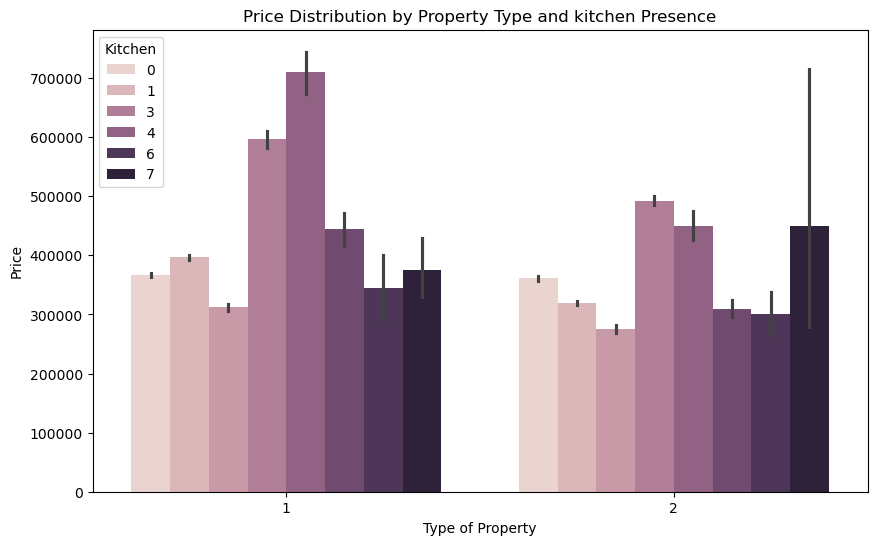

In [106]:

plt.figure(figsize=(10, 6))
sns.barplot(x='type_of_property', y='price', hue='kitchen', data=df2)
plt.title('Price Distribution by Property Type and kitchen Presence')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.legend(title='Kitchen')
plt.show()


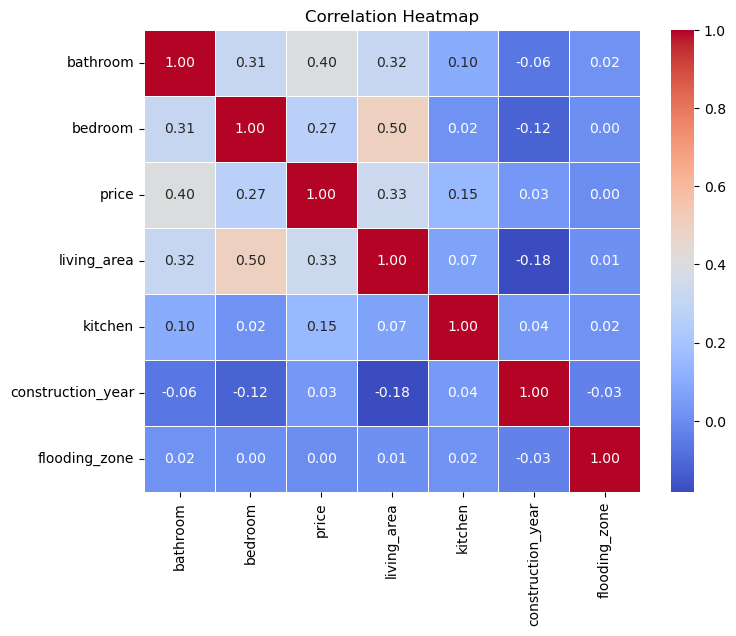

In [110]:
corr_matrix = df2[['bathroom', 'bedroom', 'price', 'living_area', 'kitchen', 'construction_year', 'flooding_zone']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**UPDATE**

In [112]:
##UPDATE##
df2.to_csv("third_check.csv", index=False)

**********

In [59]:
df3 = pd.read_csv("third_check.csv")

In [11]:
df3.head()

,Url,bathroom,bedroom,construction_year,district,fireplace,flooding_zone,furnished,garden,garden_area,...,province,region,room_count,state_of_building,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,False,0,False,False,NaN,...,West Flanders,Flanders,1.0,GOOD,flat_studio,NaN,False,True,1.0,2
1,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,False,0,True,False,NaN,...,West Flanders,Flanders,NaN,GOOD,house,0.0,False,False,2.0,1
2,https://www.immoweb.be/en/classified/house/for...,1,4,1991,Veurne,False,0,False,False,1.0,...,West Flanders,Flanders,NaN,TO_BE_DONE_UP,house,170.0,False,True,2.0,1
3,https://www.immoweb.be/en/classified/apartment...,1,2,1972,Hasselt,False,0,False,False,NaN,...,Limburg,Flanders,1.0,AS_NEW,apartment,NaN,False,True,1.0,2
4,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Brussels,False,0,True,False,NaN,...,Brussels,Brussels,NaN,AS_NEW,apartment,NaN,False,True,1.0,2


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97997 entries, 0 to 97996
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Url                  97997 non-null  object 
 1   bathroom             97997 non-null  int64  
 2   bedroom              97997 non-null  int64  
 3   construction_year    97997 non-null  int64  
 4   district             97997 non-null  object 
 5   fireplace            97997 non-null  bool   
 6   flooding_zone        97997 non-null  int64  
 7   furnished            97997 non-null  bool   
 8   garden               97997 non-null  bool   
 9   garden_area          18349 non-null  float64
 10  kitchen              97997 non-null  int64  
 11  living_area          97997 non-null  float64
 12  locality             97994 non-null  object 
 13  facades              62199 non-null  float64
 14  PEB                  68242 non-null  object 
 15  postal_code          97997 non-null 

In [17]:
df3.isna().sum()

Url                        0
bathroom                   0
bedroom                    0
construction_year          0
district                   0
fireplace                  0
flooding_zone              0
furnished                  0
garden                     0
garden_area            79648
kitchen                    0
living_area                0
locality                   3
facades                35692
PEB                    29612
postal_code                0
price                      0
property_id                0
province                   0
region                     0
room_count             69175
state_of_building      31766
subtype_of_property        0
surface_of_plot        49153
swimming_pool              0
terrace                    0
toilet_count           18618
type_of_property           0
dtype: int64

**GARDEN AREA**

In [83]:
df3.shape

(96202, 28)

In [61]:
#found and removed outliers (done)

clean_data = df3['garden_area'].dropna()
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1

# limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# without nan and keep rest of  values
df3 = df3[(df3['garden_area'].between(lower_bound, upper_bound, inclusive="both")) | (df3['garden_area'].isna())]

In [82]:
#Check garden 0 but garden_area > 0......
garden_area_data = df3.loc[(df3['garden'] == False) & (df3['garden_area'] > 0)]

garden_area_data['Url'].tolist()



[]

In [63]:
#solved the problem (entering area but not sign true for the garden)
df3.loc[(df3['garden'] == False) & (df3['garden_area'] > 0), 'garden'] = True

In [131]:
#with KNNI fillna 

# KNNI object
imputer = KNNImputer(n_neighbors=10)

# fillna
df3['garden_area'] = imputer.fit_transform(df3[['garden_area']])

In [66]:
#solved the problem (imputer enter area value for every nan but enter a value also its garden false...==>if garden false, its area 0)
df3.loc[(df3['garden'] == False) & (df3['garden_area'] > 0), 'garden_area'] = 0

In [135]:
df3['garden_area'] = df3['garden_area'].astype(int)

In [80]:
#apartment has no special garden but shared with whole residences..
df3.loc[df3['subtype_of_property'] == 'apartment', ['garden_area', 'garden']] = [0, False]

In [115]:
df3.loc[df3['subtype_of_property'] == 'penthouse', ['garden_area', 'garden']] = [0, False]

In [117]:
df3.loc[df3['subtype_of_property'] == 'service_flat', ['garden_area', 'garden']] = [0, False]

In [118]:
df3.loc[df3['subtype_of_property'] == 'loft', ['garden_area', 'garden']] = [0, False]

In [79]:
df3.subtype_of_property.value_counts()

subtype_of_property
apartment               38997
house                   38861
villa                    3042
ground_floor             2993
penthouse                2076
duplex                   2021
apartment_block          1730
flat_studio              1620
mixed_use_building       1297
service_flat              585
town_house                548
bungalow                  402
kot                       394
mansion                   360
loft                      297
country_cottage           186
farmhouse                 185
exceptional_property      183
triplex                   170
chalet                    143
other_property             59
manor_house                39
castle                     12
pavilion                    2
Name: count, dtype: int64

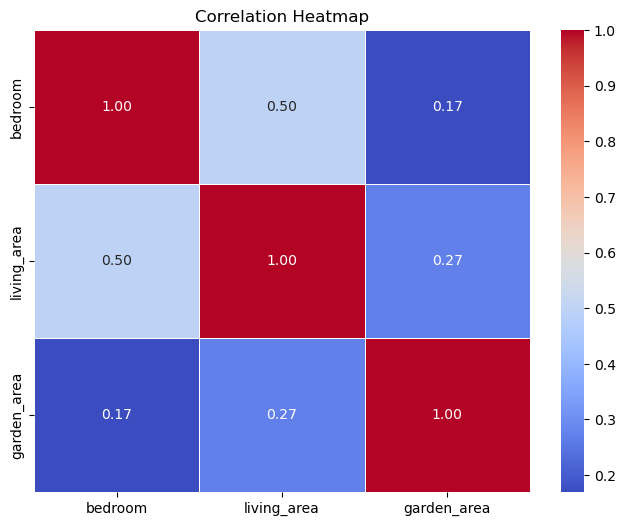

In [96]:
corr_matrix = df3[['bedroom', 'living_area', 'garden_area']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

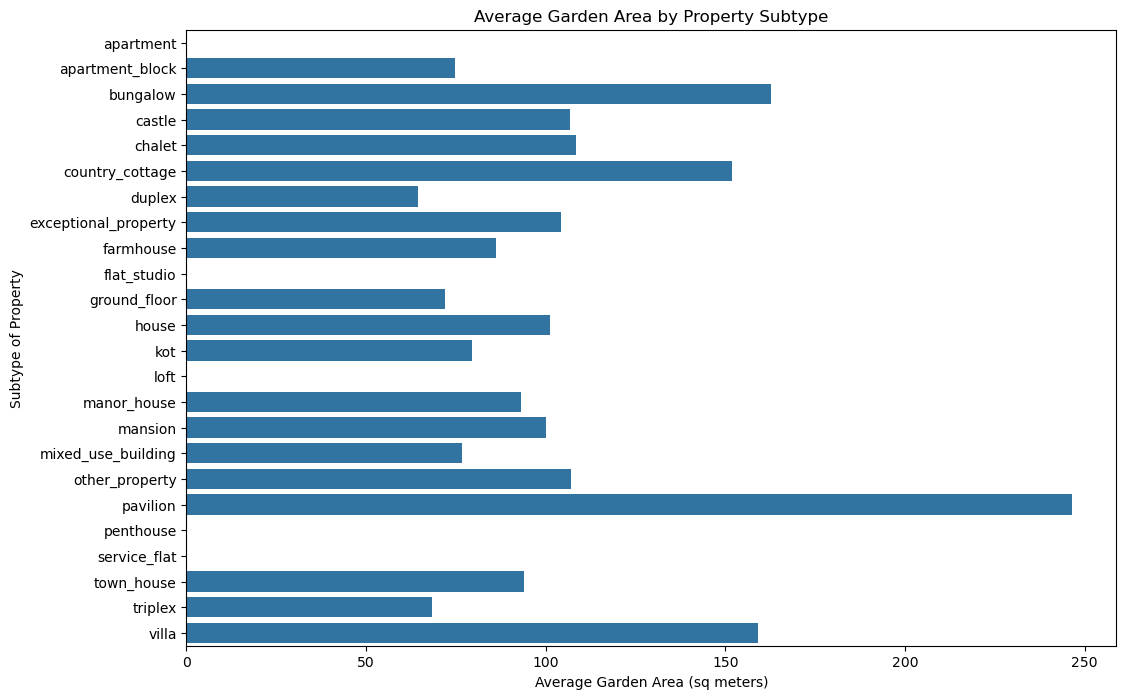

In [140]:
# Bar grafiği için ortalama hesaplama
mean_garden_area = df3.groupby('subtype_of_property')['garden_area'].mean().reset_index()

# Bar grafiği çizimi
plt.figure(figsize=(12, 8))  # Grafiğin boyutunu genişleterek daha okunabilir hale getirin
sns.barplot(x='garden_area', y='subtype_of_property', data=mean_garden_area)  # x ve y eksenlerini değiştir
plt.title('Average Garden Area by Property Subtype')
plt.xlabel('Average Garden Area (sq meters)')
plt.ylabel('Subtype of Property')
plt.show()

In [130]:
df3.loc[df3['garden_area'] == 1, 'garden_area'] = np.nan

#then again impruter....

******FOURT CHECK AND Update******

In [216]:
df3.to_csv("fourth_check.csv", index=False)

*************

In [234]:
df4 = pd.read_csv("fourth_check.csv")

In [218]:
df4.head(30)

,Url,bathroom,bedroom,construction_year,district,fireplace,flooding_zone,furnished,garden,garden_area,...,province,region,room_count,state_of_building,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,False,0,False,False,0,...,West Flanders,Flanders,1.0,GOOD,flat_studio,NaN,False,True,1.0,2
1,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,False,0,True,False,0,...,West Flanders,Flanders,NaN,GOOD,house,0.0,False,False,2.0,1
2,https://www.immoweb.be/en/classified/house/for...,1,4,1991,Veurne,False,0,False,True,54,...,West Flanders,Flanders,NaN,TO_BE_DONE_UP,house,170.0,False,True,2.0,1
3,https://www.immoweb.be/en/classified/apartment...,1,2,1972,Hasselt,False,0,False,False,0,...,Limburg,Flanders,1.0,AS_NEW,apartment,NaN,False,True,1.0,2
4,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Brussels,False,0,True,False,0,...,Brussels,Brussels,NaN,AS_NEW,apartment,NaN,False,True,1.0,2
5,https://www.immoweb.be/en/classified/house/for...,1,2,1991,Mechelen,False,0,False,False,0,...,Antwerp,Flanders,1.0,NaN,house,423.0,False,False,0.0,1
6,https://www.immoweb.be/en/classified/apartment...,2,3,2023,Halle-Vilvoorde,False,0,False,False,0,...,Flemish Brabant,Flanders,NaN,NaN,apartment,NaN,False,False,NaN,2
7,https://www.immoweb.be/en/classified/apartment...,1,2,1991,Sint-Niklaas,False,0,False,False,0,...,East Flanders,Flanders,NaN,NaN,apartment,NaN,False,False,NaN,2
8,https://www.immoweb.be/en/classified/apartment...,1,2,1961,Oostend,False,0,True,False,0,...,West Flanders,Flanders,NaN,GOOD,apartment,NaN,False,False,1.0,2
9,https://www.immoweb.be/en/classified/apartment...,1,1,1991,Sint-Niklaas,False,0,False,False,0,...,East Flanders,Flanders,NaN,NaN,apartment,NaN,False,False,NaN,2


In [153]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96202 entries, 0 to 96201
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Url                  96202 non-null  object 
 1   bathroom             96202 non-null  int64  
 2   bedroom              96202 non-null  int64  
 3   construction_year    96202 non-null  int64  
 4   district             96202 non-null  object 
 5   fireplace            96202 non-null  bool   
 6   flooding_zone        96202 non-null  int64  
 7   furnished            96202 non-null  bool   
 8   garden               96202 non-null  bool   
 9   garden_area          96202 non-null  int64  
 10  kitchen              96202 non-null  int64  
 11  living_area          96202 non-null  float64
 12  locality             96199 non-null  object 
 13  facades              60510 non-null  float64
 14  PEB                  66590 non-null  object 
 15  postal_code          96202 non-null 

In [154]:
df4.isna().sum()

Url                        0
bathroom                   0
bedroom                    0
construction_year          0
district                   0
fireplace                  0
flooding_zone              0
furnished                  0
garden                     0
garden_area                0
kitchen                    0
living_area                0
locality                   3
facades                35692
PEB                    29612
postal_code                0
price                      0
property_id                0
province                   0
region                     0
room_count             69175
state_of_building      31766
subtype_of_property        0
surface_of_plot        49153
swimming_pool              0
terrace                    0
toilet_count           18618
type_of_property           0
dtype: int64

In [108]:
df4.subtype_of_property.value_counts()

subtype_of_property
apartment               38997
house                   38861
villa                    3042
ground_floor             2993
penthouse                2076
duplex                   2021
apartment_block          1730
flat_studio              1620
mixed_use_building       1297
service_flat              585
town_house                548
bungalow                  402
kot                       394
mansion                   360
loft                      297
country_cottage           186
farmhouse                 185
exceptional_property      183
triplex                   170
chalet                    143
other_property             59
manor_house                39
castle                     12
pavilion                    2
Name: count, dtype: int64

**Facades**

In [235]:
#checked and decided to remove it

del df4['facades']

*****

**PEB**

In [236]:
#Clean the tricky PEB data
df4 = df4.drop(df4[df4['PEB'].isin(["B_A", "A_A+", "F_C", "F_D", "G_C", "F_E", "E_D", "E_C", "G_F"])].index)


#Grade the PEB
PEB_grade = {
   'A++': 9,
 'A+': 8,
 'A': 7,
 'B': 6,
 'C': 5,
 'D': 4,
 'E': 3,
 'F': 2,
 'G': 1
}
df4['PEB_grade'] = df4['PEB'].map(PEB_grade)
del df4['PEB']

In [237]:
df4.PEB_grade.value_counts()

PEB_grade
6.0    13550
7.0    12951
5.0    10814
4.0     8829
2.0     8053
3.0     6027
1.0     4015
8.0     1723
9.0      556
Name: count, dtype: int64

In [238]:
##PEB_grade fill nan with imputer and convert it to int

imputer = KNNImputer(n_neighbors=10)

df4[['PEB_grade']] = imputer.fit_transform(df4[['PEB_grade']])

df4['PEB_grade'] = df4['PEB_grade'].round().astype(int)

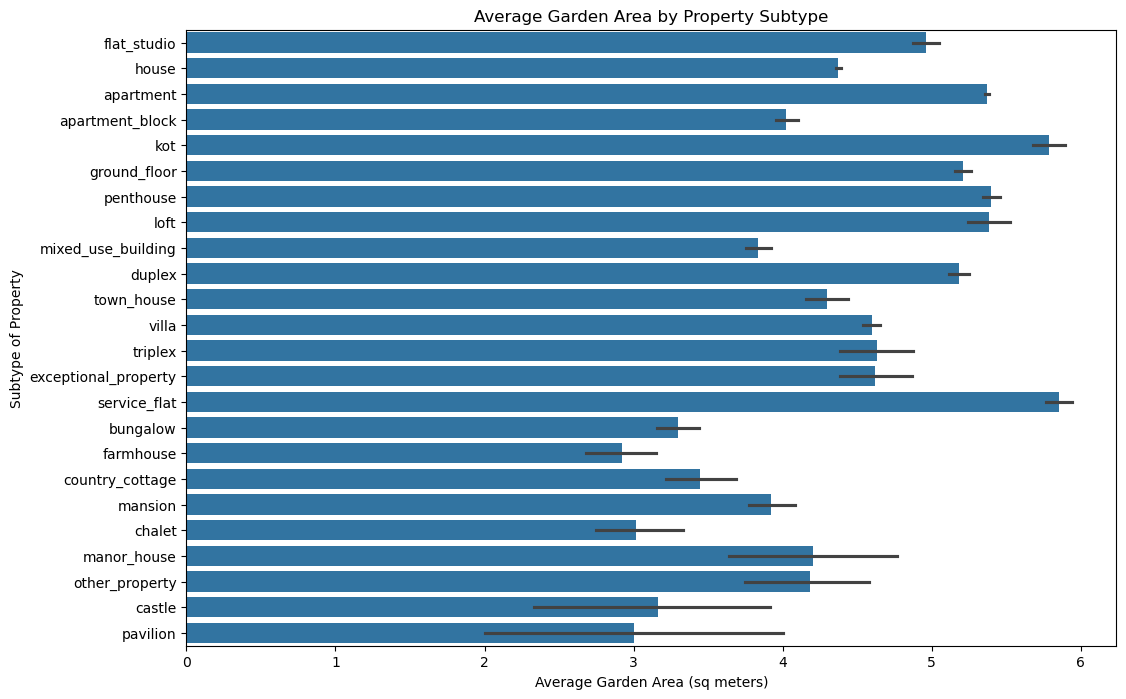

In [239]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='PEB_grade', y='subtype_of_property', data=df4)  
plt.title('Average Garden Area by Property Subtype')
plt.xlabel('Average Garden Area (sq meters)')
plt.ylabel('Subtype of Property')
plt.show()

**********

*****Fifth check and update*****

In [241]:
df4.to_csv("fifth_check.csv", index=False)

**************


In [249]:
df5 = pd.read_csv("fifth_check.csv")

In [257]:
df5.head(10)

,Url,bathroom,bedroom,construction_year,district,fireplace,flooding_zone,furnished,garden,garden_area,...,region,room_count,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property,PEB_grade,Building_state_grade
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,False,0,False,False,0,...,Flanders,1.0,flat_studio,NaN,False,True,1.0,2,5,4
1,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,False,0,True,False,0,...,Flanders,NaN,house,0.0,False,False,2.0,1,6,4
2,https://www.immoweb.be/en/classified/house/for...,1,4,1991,Veurne,False,0,False,True,54,...,Flanders,NaN,house,170.0,False,True,2.0,1,2,3
3,https://www.immoweb.be/en/classified/apartment...,1,2,1972,Hasselt,False,0,False,False,0,...,Flanders,1.0,apartment,NaN,False,True,1.0,2,6,6
4,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Brussels,False,0,True,False,0,...,Brussels,NaN,apartment,NaN,False,True,1.0,2,3,6
5,https://www.immoweb.be/en/classified/house/for...,1,2,1991,Mechelen,False,0,False,False,0,...,Flanders,1.0,house,423.0,False,False,0.0,1,2,4
6,https://www.immoweb.be/en/classified/apartment...,2,3,2023,Halle-Vilvoorde,False,0,False,False,0,...,Flanders,NaN,apartment,NaN,False,False,NaN,2,7,4
7,https://www.immoweb.be/en/classified/apartment...,1,2,1991,Sint-Niklaas,False,0,False,False,0,...,Flanders,NaN,apartment,NaN,False,False,NaN,2,5,4
8,https://www.immoweb.be/en/classified/apartment...,1,2,1961,Oostend,False,0,True,False,0,...,Flanders,NaN,apartment,NaN,False,False,1.0,2,5,4
9,https://www.immoweb.be/en/classified/apartment...,1,1,1991,Sint-Niklaas,False,0,False,False,0,...,Flanders,NaN,apartment,NaN,False,False,NaN,2,5,4


In [258]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96130 entries, 0 to 96129
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   96130 non-null  object 
 1   bathroom              96130 non-null  int64  
 2   bedroom               96130 non-null  int64  
 3   construction_year     96130 non-null  int64  
 4   district              96130 non-null  object 
 5   fireplace             96130 non-null  bool   
 6   flooding_zone         96130 non-null  int64  
 7   furnished             96130 non-null  bool   
 8   garden                96130 non-null  bool   
 9   garden_area           96130 non-null  int64  
 10  kitchen               96130 non-null  int64  
 11  living_area           96130 non-null  float64
 12  locality              96127 non-null  object 
 13  postal_code           96130 non-null  int64  
 14  price                 96130 non-null  int64  
 15  property_id        

In [259]:
df5.isna().sum()

Url                         0
bathroom                    0
bedroom                     0
construction_year           0
district                    0
fireplace                   0
flooding_zone               0
furnished                   0
garden                      0
garden_area                 0
kitchen                     0
living_area                 0
locality                    3
postal_code                 0
price                       0
property_id                 0
province                    0
region                      0
room_count              69103
subtype_of_property         0
surface_of_plot         49092
swimming_pool               0
terrace                     0
toilet_count            18610
type_of_property            0
PEB_grade                   0
Building_state_grade        0
dtype: int64

**State of Building**

In [252]:
Building_state_grade = {
    'GOOD': 4, 
'AS_NEW': 6,
'TO_RENOVATE': 1, 
'TO_BE_DONE_UP': 3,
'JUST_RENOVATED': 5,
'TO_RESTORE': 2
}
df5['Building_state_grade'] =df5['state_of_building'].map(Building_state_grade)
del df5['state_of_building']

In [256]:
imputer = KNNImputer(n_neighbors=10)
df5[['Building_state_grade']] = imputer.fit_transform(df5[['Building_state_grade']])

df5['Building_state_grade'] = df5['Building_state_grade'].round().astype(int)

**CHECK AND UPDATE**

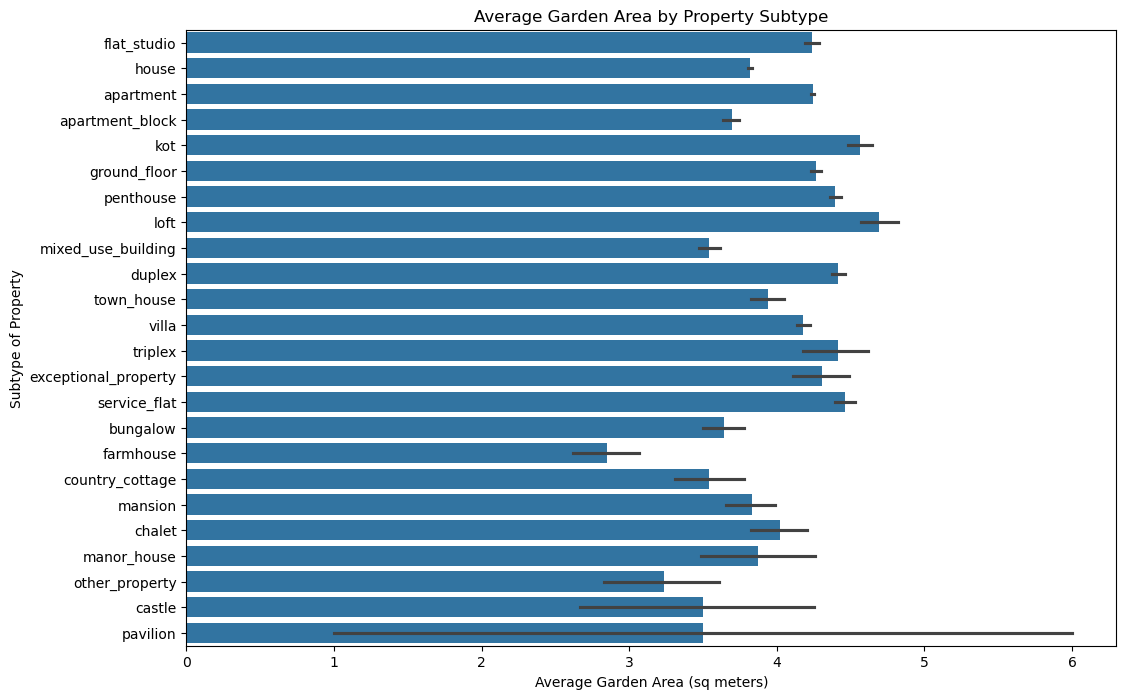

In [260]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Building_state_grade', y='subtype_of_property', data=df5)  
plt.title('Average Garden Area by Property Subtype')
plt.xlabel('Average Garden Area (sq meters)')
plt.ylabel('Subtype of Property')
plt.show()

In [307]:
df5.to_csv("sixth_check.csv", index=False)

***********


In [308]:
df6 =pd.read_csv("sixth_check.csv")

In [263]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96130 entries, 0 to 96129
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   96130 non-null  object 
 1   bathroom              96130 non-null  int64  
 2   bedroom               96130 non-null  int64  
 3   construction_year     96130 non-null  int64  
 4   district              96130 non-null  object 
 5   fireplace             96130 non-null  bool   
 6   flooding_zone         96130 non-null  int64  
 7   furnished             96130 non-null  bool   
 8   garden                96130 non-null  bool   
 9   garden_area           96130 non-null  int64  
 10  kitchen               96130 non-null  int64  
 11  living_area           96130 non-null  float64
 12  locality              96127 non-null  object 
 13  postal_code           96130 non-null  int64  
 14  price                 96130 non-null  int64  
 15  property_id        

In [282]:
df6.isna().sum()

Url                         0
bathroom                    0
bedroom                     0
construction_year           0
district                    0
fireplace                   0
flooding_zone               0
furnished                   0
garden                      0
garden_area                 0
kitchen                     0
living_area                 0
locality                    3
postal_code                 0
price                       0
property_id                 0
province                    0
region                      0
room_count              68127
subtype_of_property         0
surface_of_plot         48929
swimming_pool               0
terrace                     0
toilet_count                0
type_of_property            0
PEB_grade                   0
Building_state_grade        0
dtype: int64

**TOILET COUNT**

In [309]:
#OUTLIERS (done)

# without nan count outliers
clean_data = df6['toilet_count'].dropna()
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1

# limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# without nan and keep rest of  values
df6 = df6[(df6['toilet_count'].between(lower_bound, upper_bound, inclusive="both")) | (df6['toilet_count'].isna())]



In [310]:
#Toilet fill Nan with imputer

imputer = KNNImputer(n_neighbors=10)
df6[['toilet_count']] = imputer.fit_transform(df6[['toilet_count']])

In [311]:
#convert toint with a function

def custom_round(x):
    fractional_part = x - int(x)
    if 0 <= fractional_part <= 0.5:
        return np.floor(x)
    else:
        return np.ceil(x)

df6['toilet_count'] = df6['toilet_count'].apply(custom_round).astype(int)

*********

**SURFACE of PLOT**

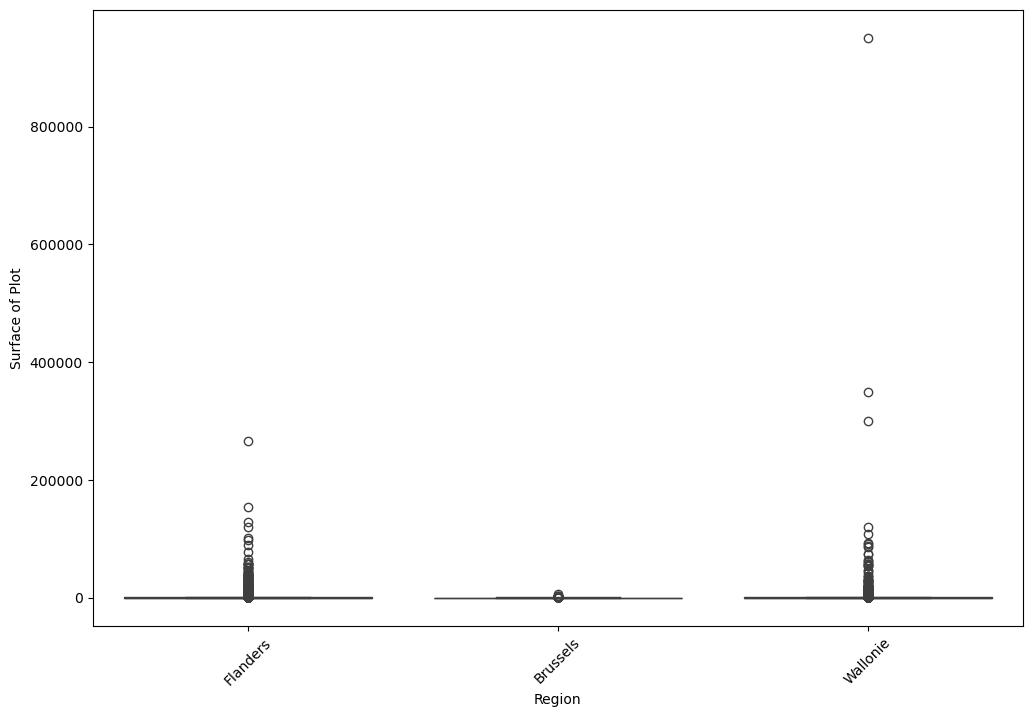

In [312]:
#before not removed outliers
#checking region and surface-area
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='surface_of_plot', data=df6)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Surface of Plot')
plt.show()

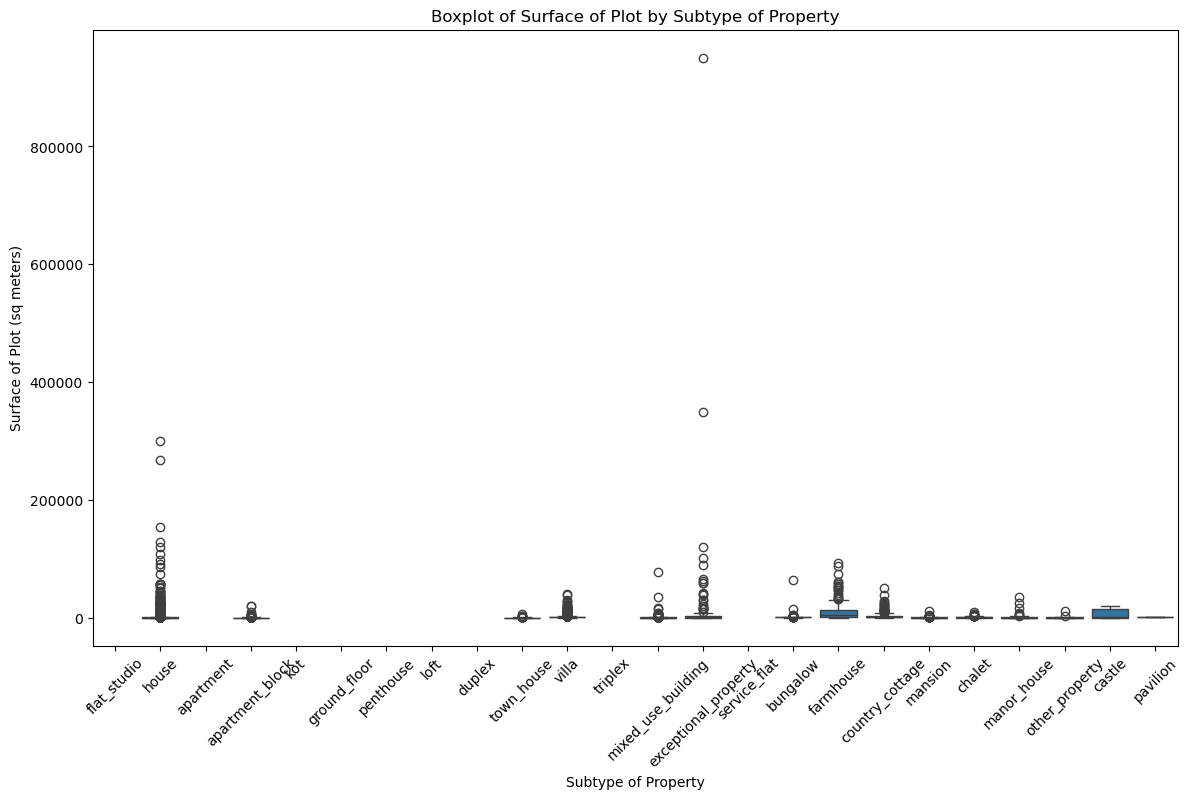

In [313]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='subtype_of_property', y='surface_of_plot', data=df6)
plt.xticks(rotation=45)
plt.title('Boxplot of Surface of Plot by Subtype of Property')
plt.xlabel('Subtype of Property')
plt.ylabel('Surface of Plot (sq meters)')
plt.show()

In [314]:
#we cannot relate surfaceofplot with flat studio because its not special feature of flatstudio

df6.loc[df6['subtype_of_property'] == 'flat_studio', 'surface_of_plot'] = 0

In [316]:
#with same reason
zero_plot = ['apartment', 'penthouse', 'apartment_block', 'service_flat']
df6.loc[df6['subtype_of_property'].isin(zero_plot), 'surface_of_plot'] = 0

In [320]:
# iqr 
Q1 = df6['surface_of_plot'].quantile(0.25)
Q3 = df6['surface_of_plot'].quantile(0.75)
IQR = Q3 - Q1

# limits 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# limited
df6.loc[df6['surface_of_plot'] < lower_bound, 'surface_of_plot'] = lower_bound
df6.loc[df6['surface_of_plot'] > upper_bound, 'surface_of_plot'] = upper_bound

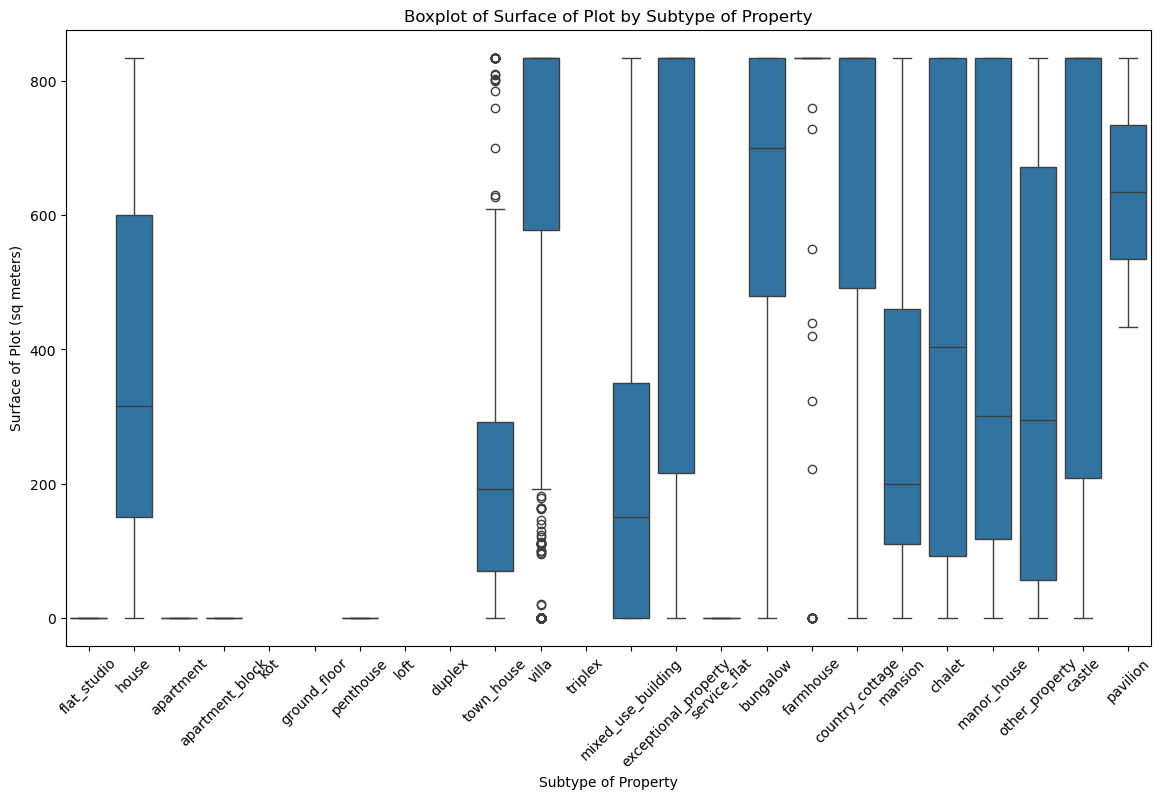

In [321]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='subtype_of_property', y='surface_of_plot', data=df6)
plt.xticks(rotation=45)
plt.title('Boxplot of Surface of Plot by Subtype of Property')
plt.xlabel('Subtype of Property')
plt.ylabel('Surface of Plot (sq meters)')
plt.show()

In [ ]:
#fill Nan with subtype_of_property because as we saw in graphics we should think them together

df6['surface_of_plot'] = df6['surface_of_plot'].fillna(
    df6.groupby('subtype_of_property')['surface_of_plot'].transform('median'))

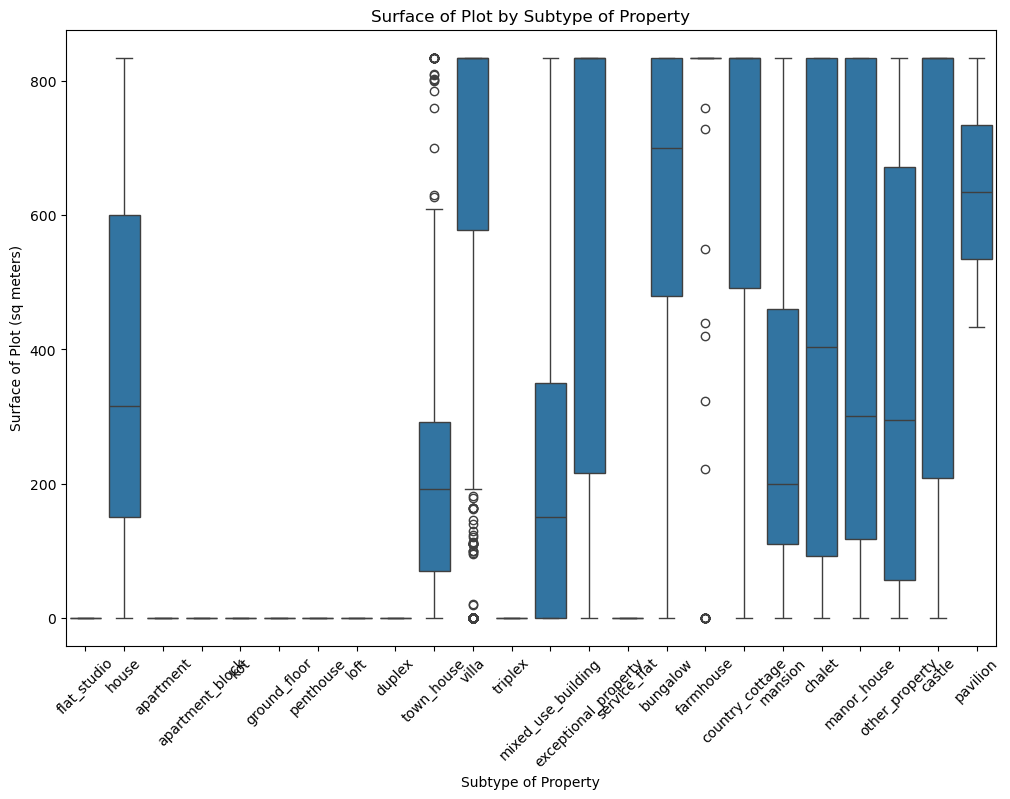

In [340]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='subtype_of_property', y='surface_of_plot', data=df6)
plt.xticks(rotation=45)
plt.title('Surface of Plot by Subtype of Property')
plt.xlabel('Subtype of Property')
plt.ylabel('Surface of Plot (sq meters)')
plt.show()

In [341]:
df6.isna().sum()

Url                         0
bathroom                    0
bedroom                     0
construction_year           0
district                    0
fireplace                   0
flooding_zone               0
furnished                   0
garden                      0
garden_area                 0
kitchen                     0
living_area                 0
locality                    3
postal_code                 0
price                       0
property_id                 0
province                    0
region                      0
room_count              68127
subtype_of_property         0
surface_of_plot             0
swimming_pool               0
terrace                     0
toilet_count                0
type_of_property            0
PEB_grade                   0
Building_state_grade        0
dtype: int64

**CHECK and UPDATE**

In [342]:
df6.to_csv("seventh_check.csv", index=False)

*********

In [354]:
df7 = pd.read_csv("seventh_check.csv")

**ROOM COUNT**

In [355]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Eksik değerleri geçici olarak doldurma
imputer = SimpleImputer(strategy='median')
df7[['living_area', 'bathroom', 'kitchen']] = imputer.fit_transform(df7[['living_area', 'bathroom', 'kitchen']])

# Eğitim setini eksik olmayan room_count değerleri ile oluşturma
train_data = df7.dropna(subset=['room_count'])
X_train = train_data[['living_area', 'bathroom', 'kitchen']]
y_train = train_data['room_count']

# Modeli eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [356]:
# Eksik room_count değerleri olan veri seti
missing_data = df7[df7['room_count'].isna()]
X_missing = missing_data[['living_area', 'bathroom', 'kitchen']]

# Tahminleri gerçekleştirme
predicted_room_counts = model.predict(X_missing)

# Eksik değerleri doldurma
df7.loc[df7['room_count'].isna(), 'room_count'] = predicted_room_counts

In [360]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Çoklu imputasyon uygulayıcı
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
df7[['room_count', 'living_area', 'bathroom', 'kitchen']] = iterative_imputer.fit_transform(df7[['room_count', 'living_area', 'bathroom', 'kitchen']])

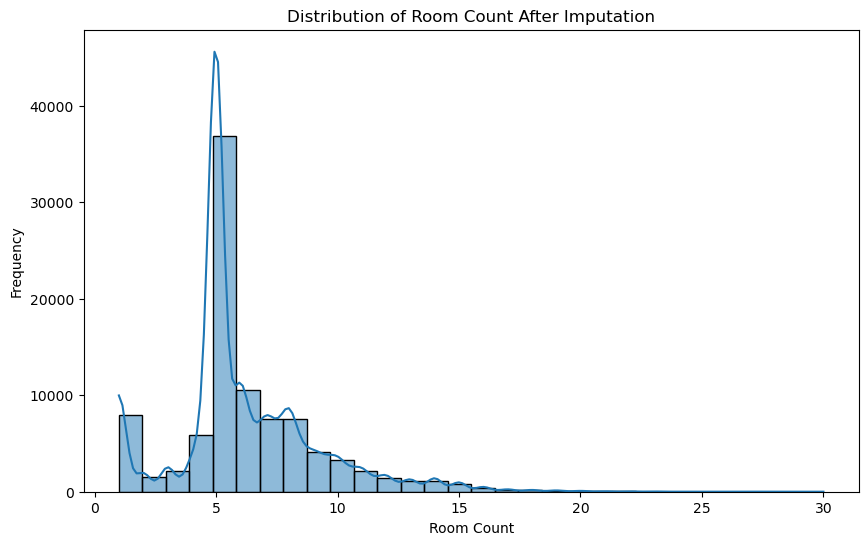

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# room_count için histogram çizimi
plt.figure(figsize=(10, 6))
sns.histplot(df7['room_count'], kde=True, bins=30)
plt.title('Distribution of Room Count After Imputation')
plt.xlabel('Room Count')
plt.ylabel('Frequency')
plt.show()

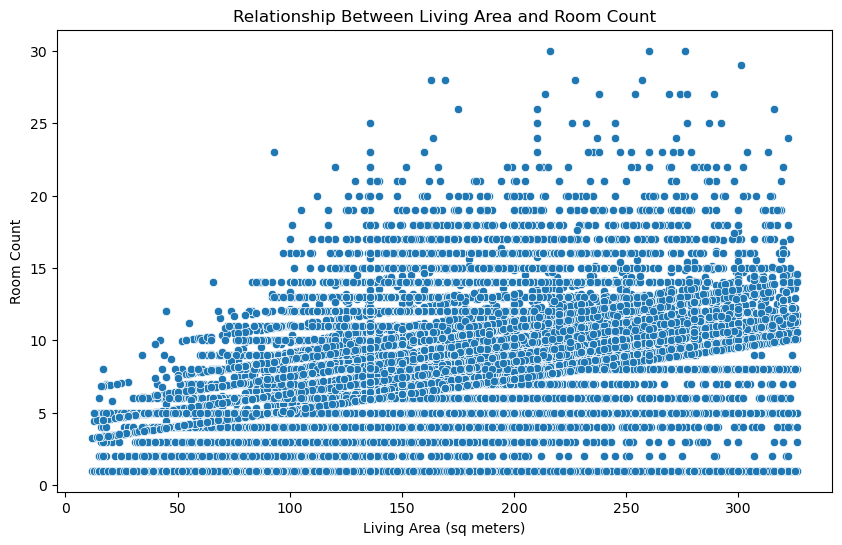

In [370]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_area', y='room_count', data=df7)
plt.title('Relationship Between Living Area and Room Count')
plt.xlabel('Living Area (sq meters)')
plt.ylabel('Room Count')
plt.show()

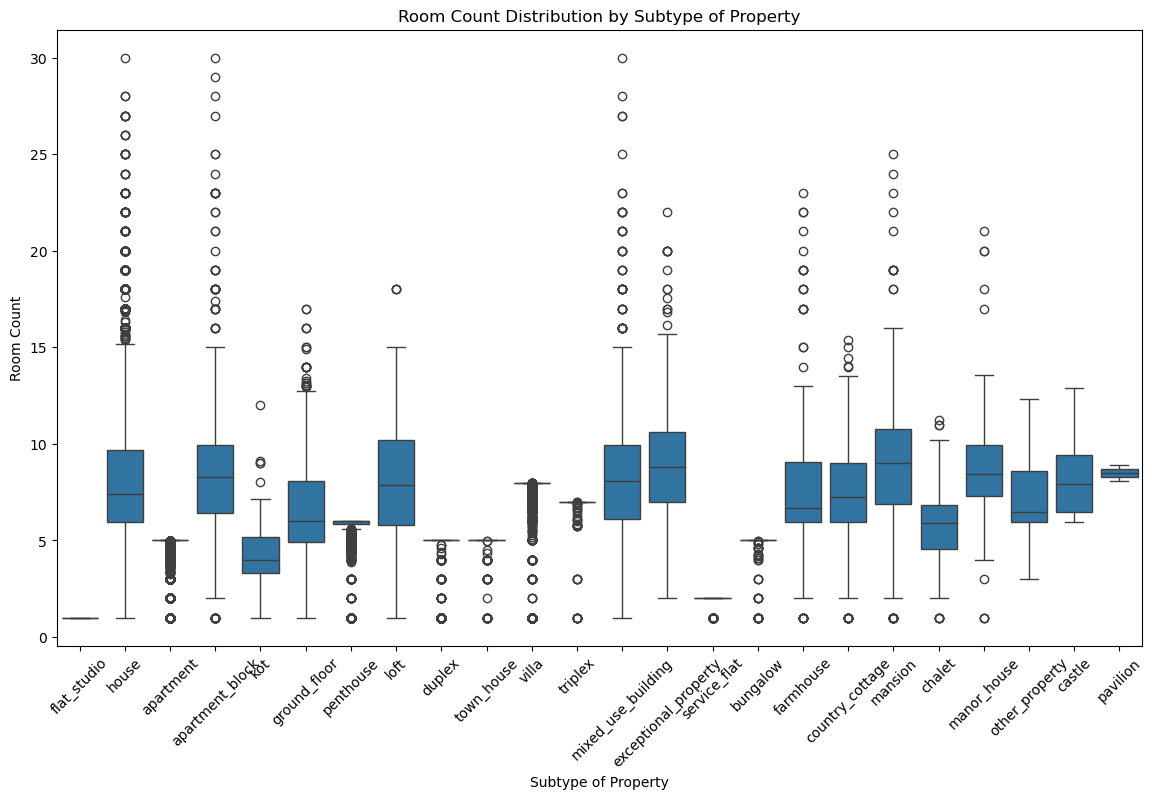

In [369]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='subtype_of_property', y='room_count', data=df7)
plt.xticks(rotation=45)
plt.title('Room Count Distribution by Subtype of Property')
plt.xlabel('Subtype of Property')
plt.ylabel('Room Count')
plt.show()

In [366]:
df7.loc[df7['subtype_of_property'] == 'flat_studio', 'room_count'] = df7.loc[df7['subtype_of_property'] == 'flat_studio', 'room_count'].clip(upper=1)

In [368]:
# maxrooms_type
max_rooms = {
    'penthouse': 6, 'apartment': 5, 'service_flat': 2, 'villa': 8, 'bungalow': 5,
    'duplex': 5, 'triplex': 7, 'town_house': 5
}

# limited with maxrooms
for subtype, max_count in max_rooms.items():
    df7.loc[df7['subtype_of_property'] == subtype, 'room_count'] = df7.loc[df7['subtype_of_property'] == subtype, 'room_count'].clip(upper=max_count)

In [377]:
len(df7)

94929

In [375]:
df7 = df7.dropna(subset=['locality'])

###LAST CHECK AND UPDATE###

In [378]:
df7.to_csv("last_check.csv", index=False)

In [3]:
df8 =pd.read_csv("last_check.csv")

In [4]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94929 entries, 0 to 94928
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   94929 non-null  object 
 1   bathroom              94929 non-null  float64
 2   bedroom               94929 non-null  int64  
 3   construction_year     94929 non-null  int64  
 4   district              94929 non-null  object 
 5   fireplace             94929 non-null  bool   
 6   flooding_zone         94929 non-null  int64  
 7   furnished             94929 non-null  bool   
 8   garden                94929 non-null  bool   
 9   garden_area           94929 non-null  int64  
 10  kitchen               94929 non-null  float64
 11  living_area           94929 non-null  float64
 12  locality              94929 non-null  object 
 13  postal_code           94929 non-null  int64  
 14  price                 94929 non-null  int64  
 15  property_id        

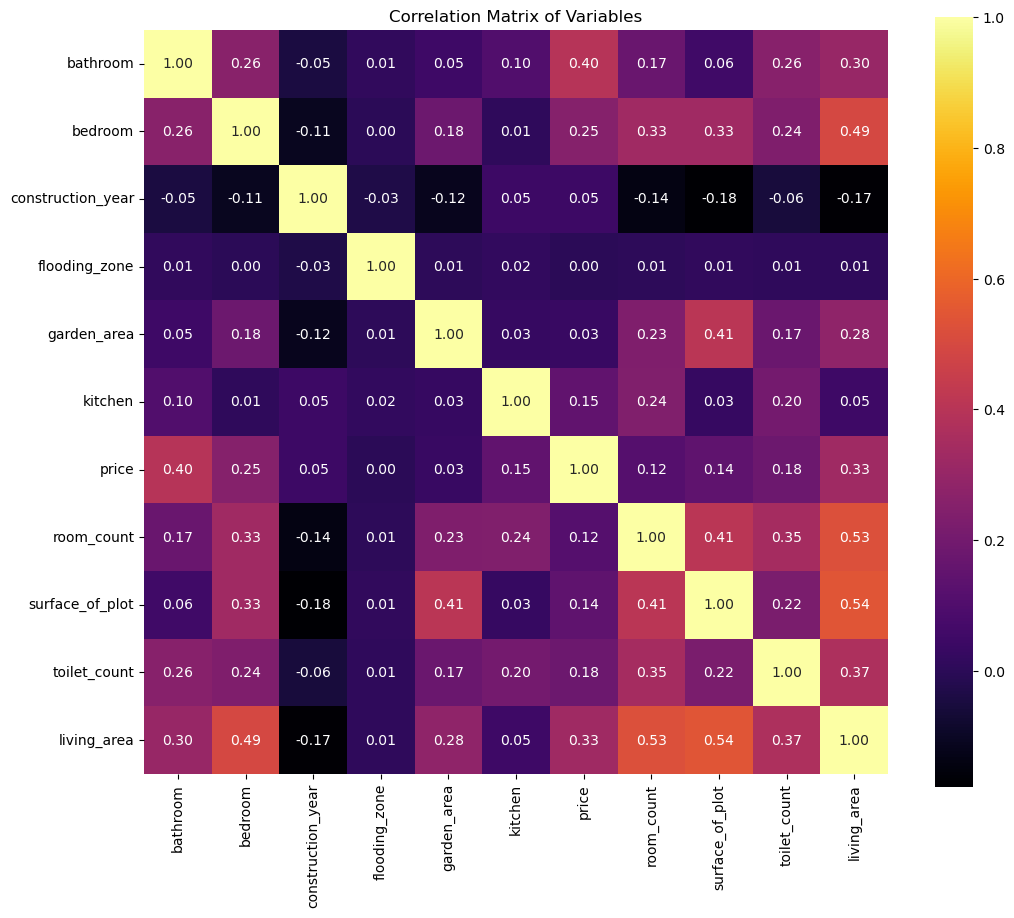

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = df8[['bathroom', 'bedroom', 'construction_year', 'flooding_zone',
                          'garden_area', 'kitchen', 'price', 'room_count', 
                          'surface_of_plot', 'toilet_count', 'living_area']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='inferno', cbar=True, square=True)
plt.title('Correlation Matrix of Variables')
plt.show()